Состояния Белла

Вопросы.

1) Квантовая схема по формированию состояний Белла

2) Нормировка состояний Белла.

3) Ортогональность состояний Белла.

4) Полнота.

5) Визуализация.

In [121]:
#initialization
import numpy as np  # сокращение

% matplotlib inline

# importing Qiskit
from qiskit import (
    QuantumCircuit,
    execute,
    Aer)
# import basic plot tools
from qiskit.visualization import (
    plot_state_qsphere)
# Use Aer's qasm_simulator
#simulator = Aer.get_backend('qasm_simulator')
#simulator = Aer.get_backend('statevector_simulator')
#simulator = Aer.get_backend('unitary_simulator')
#from qiskit.extensions import Initialize
#from qiskit_textbook.tools import random_state, array_to_latex

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


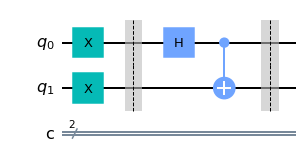

In [122]:
nq = 2
nc = 2
qc = QuantumCircuit(nq, nc)
#init
qc.x(0)
qc.x(1)
qc.barrier()
backend = Aer.get_backend('statevector_simulator')
initial_state = execute(qc, backend).result().get_statevector()
print(initial_state)
# Результаты
qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.draw('mpl')


In [123]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc, backend).result().get_statevector()
print(final_state)  #|betta_ab>


[ 0.        +0.00000000e+00j -0.70710678+8.65956056e-17j
  0.70710678-8.65956056e-17j  0.        +0.00000000e+00j]


In [128]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc, backend).result().get_unitary()
unitary

array([[ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678-8.65956056e-17j,  0.70710678+0.00000000e+00j],
       [-0.70710678+8.65956056e-17j,  0.70710678+0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.70710678-8.65956056e-17j,  0.70710678+0.00000000e+00j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        -0.70710678+8.65956056e-17j,  0.70710678+0.00000000e+00j]])

In [ ]:
plot_state_qsphere(final_state, show_state_phases='true')

In [ ]:
def create_bell_pair(qcB, a, b):
    """создаем белловские пары"""
    qcB.h(a)  #  a в |+>
    qcB.cx(a, b)  # CNOT (CX)

In [ ]:
nq = 2
nc = 2
qcA = QuantumCircuit(nq, nc)
#init
qcA.x(0)
qcA.x(1)
qcA.barrier()
qcA.draw('mpl')

In [ ]:
create_bell_pair(qcA, 0, 1)
qcA.draw('mpl')

In [ ]:
plot_state_qsphere(final_state, show_state_phases='true')

In [149]:
sum = 0
one_sqrt = 1/np.sqrt(2)
for i in [[one_sqrt, 0, 0, one_sqrt], [one_sqrt, 0, 0, -one_sqrt], [0, one_sqrt, one_sqrt, 0], [0, -one_sqrt, one_sqrt, 0]]:
    print(i)
    sum += np.outer(i, np.transpose(i))
print("Normalized value : ")
print(sum)

[0.7071067811865475, 0, 0, 0.7071067811865475]
[0.7071067811865475, 0, 0, -0.7071067811865475]
[0, 0.7071067811865475, 0.7071067811865475, 0]
[0, -0.7071067811865475, 0.7071067811865475, 0]
Normalized value : 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
